In [1]:
%pip install pandas matplotlib scikit-learn

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: d:\ai_projects\drive_d_venv\Scripts\python.exe -m pip install --upgrade pip


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Importing data

In [2]:
df = pd.read_csv(r".\weekly_apple_sales_1000_rows_with_weather.csv")

In [3]:
df.head()

,Week,Apple Sales,Weather
0,week_1,111,Sunny
1,week_2,51,Sunny
2,week_3,70,Rainy
3,week_4,72,Rainy
4,week_5,88,Rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Week         1000 non-null   object
 1   Apple Sales  1000 non-null   int64 
 2   Weather      1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


Exploratory Data Analysis

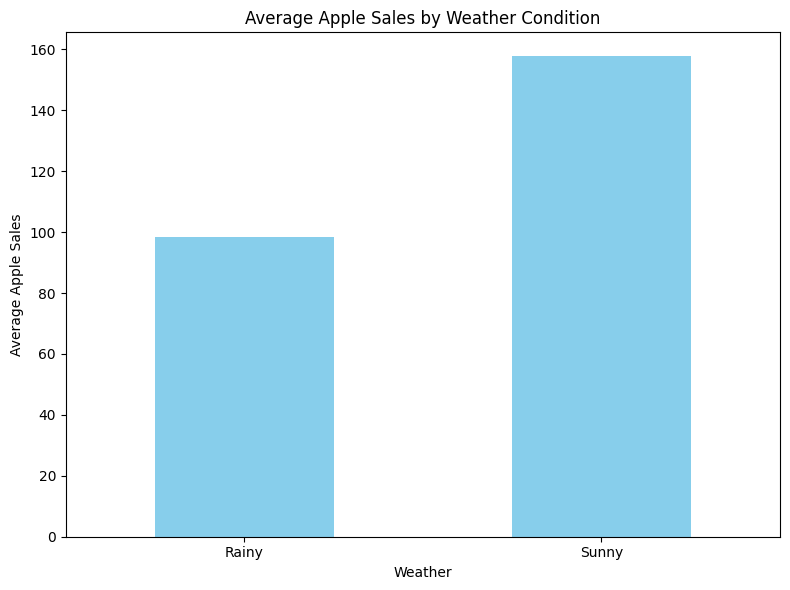

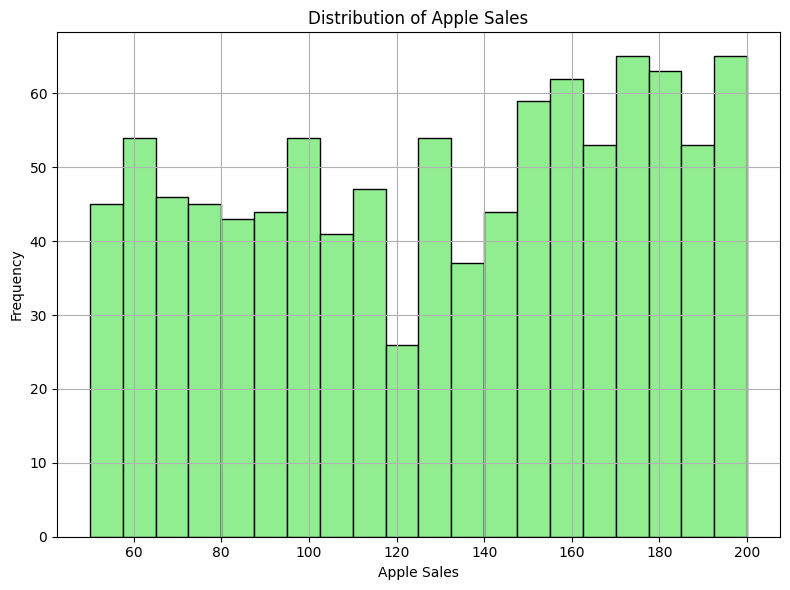

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Bar Plot: Apple Sales by Weather Condition
plt.figure(figsize=(8, 6))
df.groupby('Weather')['Apple Sales'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Apple Sales by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Apple Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histogram: Distribution of Apple Sales
plt.figure(figsize=(8, 6))
plt.hist(df['Apple Sales'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Apple Sales')
plt.xlabel('Apple Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Data Preprocessing

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# If there were any missing values, you could handle them like this:
# df['Apple Sales'].fillna(df['Apple Sales'].mean(), inplace=True)
# df.dropna(inplace=True)

# Encoding Categorical Data
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])

# Feature Scaling (if necessary)
scaler = StandardScaler()
df['Apple Sales'] = scaler.fit_transform(df[['Apple Sales']])

# If you need to create new features (feature engineering), you can do that here
# For example, extract week number as a feature
df['Week_Number'] = df['Week'].str.extract(r'(\d+)').astype(int)

# Display the preprocessed DataFrame
print(df.head())

# Splitting the Data (if you plan to build a model)
X = df[['Weather', 'Week_Number']]  # Features
y = df['Apple Sales']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Week           0
Apple Sales    0
Weather        0
dtype: int64
     Week  Apple Sales  Weather  Week_Number
0  week_1    -0.409614        1            1
1  week_2    -1.754226        1            2
2  week_3    -1.328432        0            3
3  week_4    -1.283611        0            4
4  week_5    -0.925048        0            5
X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)


Linear Regression

In [32]:
# Fit Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

# Print the formula
formula = f"Sales = {intercept:.4f}"
for i, feature in enumerate(X.columns):
    formula += f" + ({coefficients[i]:.4f} * {feature})"
print(f"Prediction formula: {formula}")

# Make predictions
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Inverse transform the scaled predictions to get them back to the original scale
y_pred_test_original_scale = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

print("Predicted Apple Sales on test set (original scale):")
print(y_pred_test_original_scale)


Prediction formula: Sales = -0.6124 + (1.2906 * Weather) + (-0.0001 * Week_Number)
Train MSE: 0.5827
Test MSE: 0.4717
Train RMSE: 0.7634
Test RMSE: 0.6868
Train MAE: 0.5955
Test MAE: 0.5609
Train R²: 0.4177
Test R²: 0.5264
Predicted Apple Sales on test set (original scale):
[[ 98.83536909]
 [155.13761284]
 [155.11970313]
 [155.59729543]
 [157.08380144]
 [155.48983716]
 [155.80027215]
 [ 98.88312832]
 [154.4092846 ]
 [101.133782  ]
 [154.69583997]
 [101.49197622]
 [155.74057311]
 [153.72871558]
 [ 96.34591927]
 [154.17048845]
 [100.27411587]
 [ 96.67426397]
 [154.99433516]
 [157.63303257]
 [156.25995473]
 [100.90692566]
 [ 99.73085464]
 [156.39129261]
 [100.69200913]
 [158.13450448]
 [101.34272863]
 [ 96.05936389]
 [ 96.5608358 ]
 [ 96.29219014]
 [157.47184517]
 [158.70761523]
 [ 98.23837873]
 [ 98.96670697]
 [ 99.73682455]
 [158.35539091]
 [155.43610803]
 [ 98.45926516]
 [154.15854865]
 [159.18520752]
 [157.57930344]
 [101.37257815]
 [100.08307896]
 [ 96.13100274]
 [157.75243065]
 [100

Prediction formula: Sales = -0.6124 + (1.2906 * Weather) + (-0.0001 * Week_Number)